In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('traffic.csv')  # Adjust path if needed
data.head()  # Display first few rows



,Date,Visits
0,01-01-2020,1554.0
1,01-02-2020,2820.0
2,01-03-2020,2970.0
3,01-04-2020,2111.0
4,01-05-2020,2393.0


In [5]:
# Check the data structure and look for missing values
data.info()
print("Missing values:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    232 non-null    object 
 1   Visits  232 non-null    float64
dtypes: float64(1), object(1)
memory usage: 30.1+ KB
Missing values:
 Date      1684
Visits    1684
dtype: int64


In [6]:
# Basic statistics to understand traffic
print(data.describe())

            Visits
count   232.000000
mean   4081.435345
std    1018.730432
min    1554.000000
25%    3428.250000
50%    3988.000000
75%    4874.750000
max    6659.000000


In [7]:
# Remove rows with missing values
data_cleaned = data.dropna()

In [8]:
# Calculate the population mean of the 'visits' column
population_mean = data_cleaned['Visits'].mean()
print(f"Population Mean of Visits: {population_mean:.2f}")

Population Mean of Visits: 4081.44


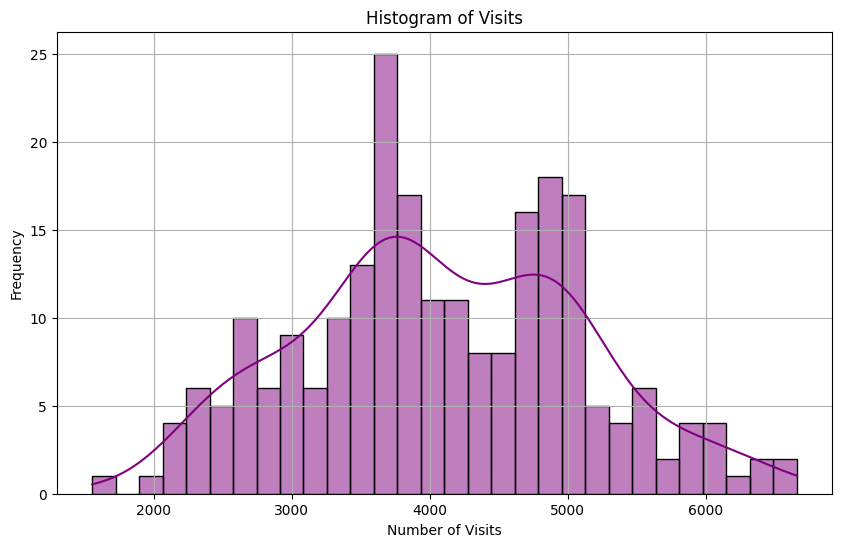

In [9]:
# Plotting the histogram for the 'visits' column
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Visits'], bins=30, kde=True, color='purple')
plt.title('Histogram of Visits')
plt.xlabel('Number of Visits')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [12]:
# Function to simulate and plot sample means for a given sample size
def plot_sample_means(data_column, sample_size, num_samples=1000):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data_column, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))

        # Plotting the distribution of sample means
    plt.figure(figsize=(10, 6))
    sns.histplot(sample_means, kde=True, bins=30, color='skyblue')
    plt.title(f'Sample Means Distribution (Sample Size = {sample_size})')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


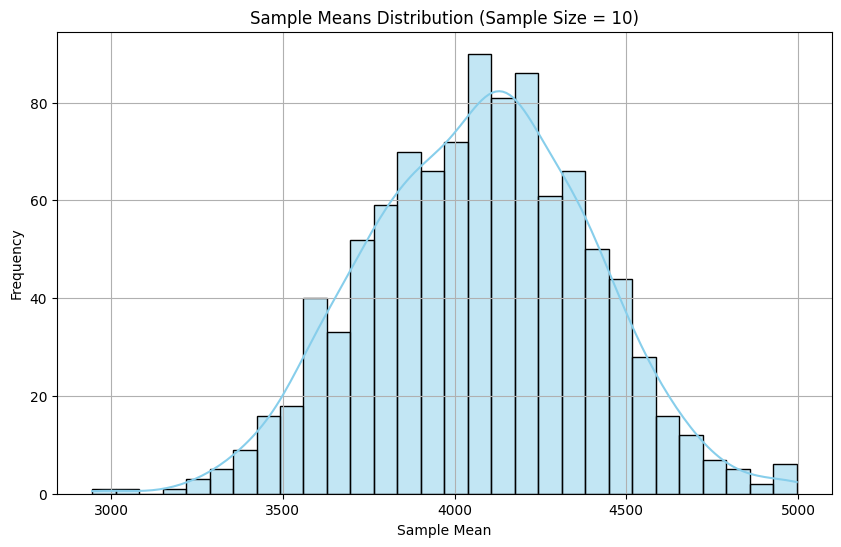

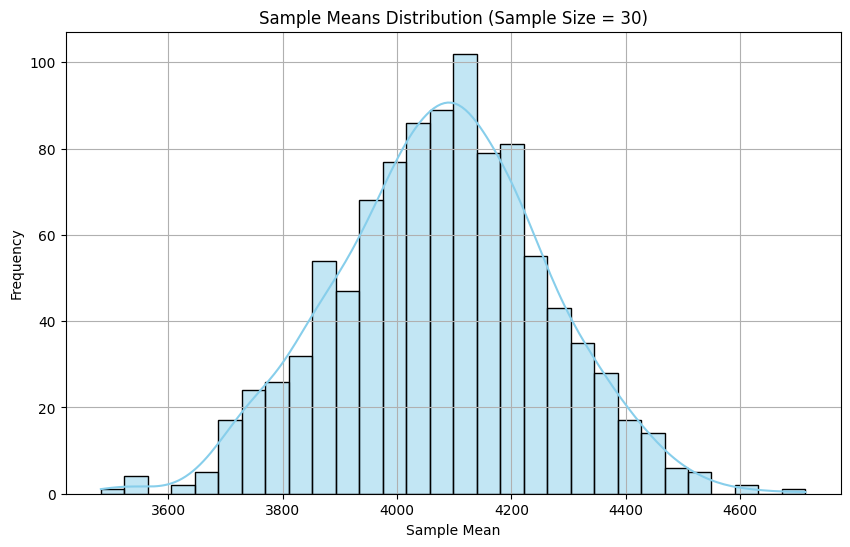

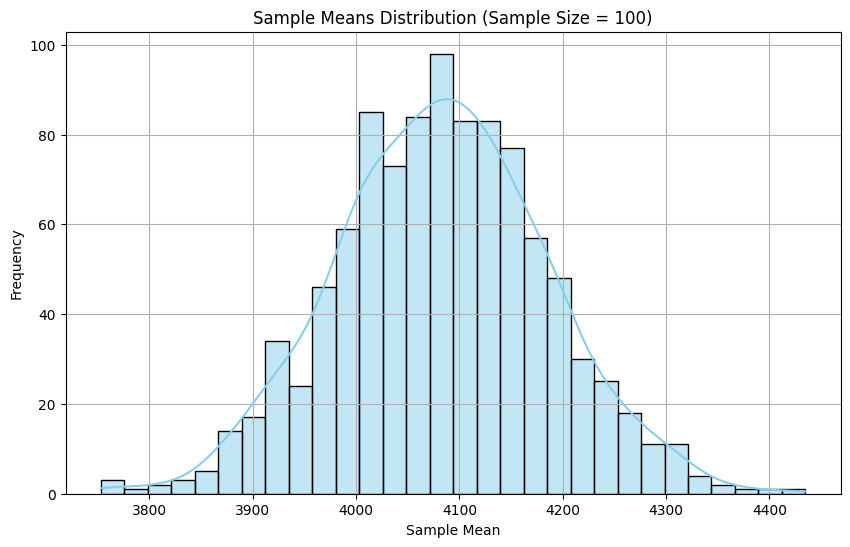

In [13]:
# Plot for sample size = 10
plot_sample_means(data_cleaned['Visits'], sample_size=10)

# Plot for sample size = 30
plot_sample_means(data_cleaned['Visits'], sample_size=30)

# Plot for sample size = 100
plot_sample_means(data_cleaned['Visits'], sample_size=100)


**Question 1**: How does the distribution of sample means change as the sample size increases, and what does this tell you about the Central Limit Theorem (CLT) in the context of website traffic data?

Answer:
As the sample size increases, the distribution of the sample means becomes more concentrated around the true population mean and takes on a bell-shaped (normal) form, even if the original data is not normally distributed.

From the histograms:

For sample size = 10, the distribution of sample means is relatively wide and slightly skewed, indicating more variability and less precision in estimating the population mean.

For sample size = 30, the distribution becomes narrower and more symmetric, showing a clearer approximation of the normal distribution.

For sample size = 100, the distribution is very tight around the population mean and closely resembles a normal distribution with reduced variability.

This behavior confirms the Central Limit Theorem, which states that as the sample size increases, the distribution of the sample mean approaches a normal distribution, regardless of the shape of the original data. In the context of website traffic data, this means that even if daily traffic patterns are erratic, we can still make reliable inferences about average traffic behavior when we have sufficiently large samples.




**Question 2**: In the context of website traffic analysis, why is understanding the Central Limit Theorem important for making data-driven decisions, especially when dealing with fluctuating traffic patterns?

Answer:
Understanding the Central Limit Theorem is crucial because it allows analysts to make reliable estimates about the population (e.g., average website traffic) based on sample data, even when traffic patterns are highly variable.

In practical terms:

When dealing with fluctuating traffic, it’s impossible to observe the entire population data (e.g., all possible days of traffic). By taking sufficiently large samples, we can confidently estimate key metrics like average page views or visits.

The CLT provides a foundation for using statistical inference, such as confidence intervals and hypothesis testing, to assess traffic metrics. This is especially valuable when planning server resources, anticipating peak loads, or assessing the effectiveness of marketing strategies.

For load balancing, understanding average traffic helps in designing systems that can handle typical loads and identify anomalies that may require adjustments in resource allocation.